In [4]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
df = pd.read_csv("/data/kaggle/data_combined_cleaned.csv")
df.dropna(inplace=True)
del df["Id"]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [41]:
target = "SalesPrice"
X = df.drop(columns=[target]) # Features

y = df[target] # Label/outcome/target

# Log transformation to reduce the impact of the outliers on y values
#y = np.log(y) 

# One hot Encoding - converts the categorical data into numeric
X = pd.get_dummies(X, drop_first=True)
features = X.columns

# X.values returns numpy array for the dataframe
# astype converts each feature to floating point number
X = X.values.astype("float")



pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                          , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(0.95)),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train) 

model_selection.cross_val_score(pipe, X, y, cv = 5, scoring="r2").mean()

0.8146846646835897

In [13]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)
pd.DataFrame(X_std).head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,0.073375,-0.230822,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.438051,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.097048,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.453780,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.616417,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [14]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_std)

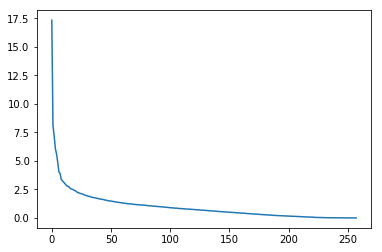

In [16]:
pd.Series(pca.explained_variance_).plot()

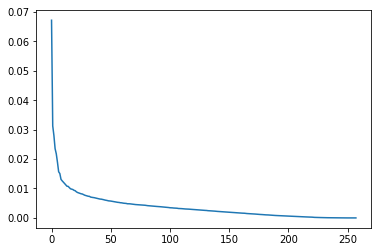

In [17]:
pd.Series(pca.explained_variance_ratio_).plot()

In [18]:
pca.explained_variance_ratio_.sum()

1.0

In [21]:
a = np.cumsum(pca.explained_variance_ratio_)
a = pd.Series(a)
a[a>0.95][:3]

163    0.951144
164    0.952673
165    0.954160
dtype: float64

In [22]:
pca.explained_variance_ratio_[:164].sum()

0.9511439247658261

In [24]:
pca = decomposition.PCA(0.95)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(1460, 164)

In [25]:
X_std.shape

(1460, 258)

In [28]:
import seaborn as sns

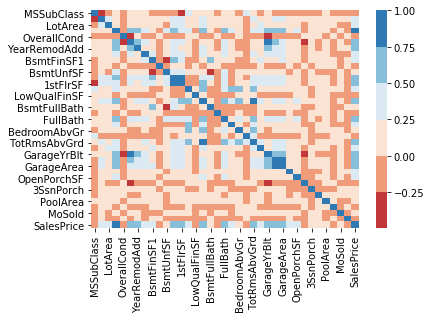

In [30]:
sns.heatmap(df.corr(), cmap=sns.color_palette("RdBu"))